## Gmartket 베스트 상품 이미지 크롤링

### Gmartket 베스트 상품 이미지 크롤링
* 패션 의류 탑 5 상품 이미지

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

In [2]:
products

[<li class="first">
 <p class="no1" id="no1">1</p>
 <div class="thumb">
 <a href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669484873927" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});"><img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
 </div>
 <!--div class="goods-view">
 									<a href="http://minishop.gmarket.co.kr/roadbling"><span class="view">판매자 다른상품 보기</span>로드블링</a>
 								</div-->
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=1975776752&amp;ver=637987669484873927" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '1975776752'});">(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈</a>
 <div class="item_price">
 <div class="o-price"><span class="for-a11y">정가</span><span>43,000원</span></div>
 <div class="s-price">
 <span class="

In [3]:
len(products)

100

In [7]:
products[0].select_one('a.itemname').get_text()

'(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈'

In [9]:
img_tag = products[0].select_one('img.lazy')
img_tag

<img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>

In [10]:
img_tag['data-original']

'//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [11]:
img_tag['src']

'//image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [12]:
'https:'+ img_tag['data-original']

'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [13]:
'https:'+ img_tag['src']

'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [8]:
img_url = 'https:'+ img_tag['data-original']
img_url

'https://gdimg.gmarket.co.kr/2304460903/still/300?ver=2022091513'

In [16]:
## 이미지 다운로드
from urllib.request import urlopen
imgUrl = 'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

index = 0
with urlopen(imgUrl) as f:
    with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

## 종합코드

* 베스트 5개 이미지만 저장할 것!

In [ ]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

for index, product in enumerate(products):
    # print(index)
    
    #이미지 태그
    img_tag = product.select_one('img.lazy')
    #이미지 URL링크 만들기
    img_url = 'https:'+ img_tag['data-original']
    # print(img_url)
    
    # 이미지 저장
    with urlopen(img_url) as f:
        with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    
    # 5개만 저장하고 for문 빠져나오기
    if index == crawl_num -1:
        break
    
print('크롤링 끝~~')

Image Crawling is done


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

In [2]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

for index, product in enumerate(products):
    # print(index)
    
    pname = product.select_one('a.itemname').get_text()
    pname = pname.replace('/','')
    # print(pname)
    
    #이미지 태그
    img_tag = product.select_one('img.lazy')
    #이미지 URL링크 만들기
    img_url = 'https:'+ img_tag['data-original']
    # print(img_url)

    # 이미지 저장
    with urlopen(img_url) as f:
        with open('./image/crawl/img'+ str(index +1) +'_'+ pname + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    
    # 5개만 저장하고 for문 빠져나오기
    if index == crawl_num -1:
        break
    
print('크롤링 끝~~')

크롤링 끝~~


In [ ]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')
for index, product in enumerate(products):
    # print(index)
    products = soup.select('div.best-list > ul > li')    
    pname = product.select_one('a.itemname').get_text()
    pname = pname.replace('/','')
    print(pname)
    # img_tag = product.select_one('img.lazy')
    # img_url = 'https:'+ img_tag['data-original']
    # print(img_tag)

### 카테고리별 베스트 상품 크롤링 자동화

* 패션의류, 신발/잡화, 화장품/헤어, 유아동/출산 .........
* 원하는 만큼 상품 크롤링

#### 자동으로 URL 만들기

* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04

> URL을 위의 순서처럼 순서대로 만들려면 어떻게 해야할까?



- 상품명을 가져오기
- 이미지를 가져오기
- 전체상품 가져오기
-> 반복문
-> 반복문 제어


In [7]:
import os
for i in range(1,13):
    cname=soup.select('ul.by-group>li')
    cname = cname[i].select_one('a').get_text()
    print(cname)

패션의류
신발/잡화
화장품/헤어
유아동/출산
식품
생활/주방/건강
가구/침구
스포츠/자동차
컴퓨터/전자
도서/음반
여행
e쿠폰/티켓


In [ ]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os
from os import path
crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
sb_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{:02d}'
for i in range(1,13):
    
    best_url = sb_url.format(i)
    #HTML 가져오기
    res = requests.get(best_url)
    #HTML 파싱하여 객체에 담기
    soup = BeautifulSoup(res.content, 'html.parser')
    #태그안의 정보 빼기
    products = soup.select('div.best-list > ul > li') 
    cname=soup.select('ul.by-group>li')
    cname = cname[i].select_one('a').get_text()
    cname = cname.replace('/','')
    for index, product in enumerate(products):
        # print(index)
        pname = product.select_one('a.itemname').get_text()
        pname = pname.replace('/','')
        #이미지 태그
        img_tag = product.select_one('img.lazy')
        #이미지 URL링크 만들기
        img_url = 'https:'+ img_tag['data-original']
        # 이미지 저장
        with urlopen(img_url) as f:
                # with open('./image/crawl/img'+ str(index +1)+'_'+cname +'_'+ pname + '.jpg','wb') as h: # w - write b - binary 
            with open('./image/crawl/['+ str(index +1)+cname +']_'+ pname + '.jpg','wb') as h:
                img = f.read()
                h.write(img)
        # 5개만 저장하고 for문 빠져나오기
        if index == crawl_num -1:
            break

    
print('크롤링 끝~~')

#### 자동으로 4개의 카테고리 베스트 상품을 크롤링 하세요

# 카테고리 - 이미지 매칭 완료 

In [10]:

import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
crawl_num = 5   #크롤 갯수
#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{:02d}'
for i in range(1,13):
    url = best_url.format(i)
    res = requests.get(url)
    #HTML 파싱하여 객체에 담기
    soup = BeautifulSoup(res.content, 'html.parser')
    #태그안의 정보 빼기
    products = soup.select('div.best-list > ul > li')
    # 상품명
    cname=soup.select('ul.by-group>li')
    cname = cname[i].select_one('a').get_text()
    cname = cname.replace('/','')
    for index, product in enumerate(products):
        #이미지 태그
        img_tag = product.select_one('img.lazy')
        print(img_tag)
        # # 이미지 URL 링크 만들기
        # img_url = 'https:'+ img_tag['data-original']
        # # 이미지 저장
        # pname = product.select_one('a.itemname').get_text()
        # pname = pname.replace('/','') # 클린징
        # # print(cname+','+pname)
      
        # with urlopen(img_url) as f:
        #     with open(f'./image/crawl/[{cname}]_{index+1}위 {pname}.jpg','wb') as h: # w - write b - binary
        #         img = f.read()
        #         h.write(img)
        #  # 5개만 저장하고 for문 빠져나오기
        # if index == crawl_num -1 : # index는 0번부터 시작하니까 -1
        #     break
print('크롤링 끝-')







<img alt="너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔" class="lazy" data-original="//gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091521" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>
<img alt="모노시크/가을신상 티셔츠/맨투맨/후드/니트/블라우스/셔츠/남방/가디건/세트/팬츠/스커트/데일리룩" class="lazy" data-original="//gdimg.gmarket.co.kr/2128333213/still/300?ver=2022091521" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>
<img alt="패션라인 가을신상 원피스/니트/맨투맨/셔츠/팬츠/청바지/자켓/데님/세트상품" class="lazy" data-original="//gdimg.gmarket.co.kr/777247382/still/300?ver=2022091521" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>
<img alt="제이프랑 가을신상 티셔츠/팬츠/긴팔/셋업" class="lazy" data-original="//gdimg.gmarket.co.kr/2250656468/still/300?ver=2022091521" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>
<img alt="쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776

### 파일 이름이 카테고리별로 정리 되려면 어떻게 해야할까요?
>예) <br>
>img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg <br>
>img1_[달바]화이트 트러플 미스트 세럼 180ml+180ml.jpg <br>
>크롤링한 파일이 섞여있어, 카테고리별 베스트 상품을 파악할 수 없어요. <br>

## Pillow(PIL) 모듈 체험

* 파이썬 이미징 라이브러리로서 여러 이미지 파일 포맷을 지원
* 이미지 내부 데이타를 엑세스할 수 있게 하며, 다양한 이미지 처리 기능을 제공

https://pillow.readthedocs.io/en/stable/reference/index.html

http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow


In [32]:
!pip install Pillow

### 이미지 읽고 쓰기

In [18]:
from PIL import Image
# 이미지 열기
fileName='dog'
tmp = Image.open('./image/' + fileName + '.jpg')

# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


### 이미지 사이즈 조절

In [60]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 200x200으로 조절
tmpResize=tmp.resize((200,200))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [61]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

size=300
tmpResize=tmp.resize((size,size))
tmpResize.save('./image/' + str(size) + fileName + '.jpg')
print('---end ---')
tmp.close()

---end ---


### 이미지에 로고 합성
 https://creativeworks.tistory.com/entry/PYTHON-3-Tutorials-41-Combine-Images-Together-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-like-watermark%EC%9B%8C%ED%84%B0%EB%A7%88%ED%81%AC?category=620431

(64, 64)


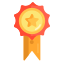

In [15]:
from PIL import Image

logo=Image.open('./image/top1.png')

print(logo.size)
logo

In [ ]:
img('./image/crawl/[1_가구침구]_[스파클]스파클생수 2L 30병.jpg')

In [ ]:
#area=(0,0,64,64)
#img('./image/crawl/[가구침구]_[스파클]스파클생수 2L 30병.jpg')
p=Image.open('./image/crawl/[가구침구]_[스파클]스파클생수 2L 30병.jpg')

area=(0,0,logo.width,logo.height)

p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


p.save('./image/crawl/[logo][가구침구]_[스파클]스파클생수 2L 30병.jpg')
p.close()
logo.close()

## 디렉토리안 파일리스트 가져오기

In [ ]:
img('./image/crawl/[화장품헤어]_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg')

In [20]:
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList

['2_도서음반_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '4_유아동출산_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'category_num10_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'category_num4_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'img2_도서음반_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'img4_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'img4_유아동출산_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2-0도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2-1도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2-2도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2-도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2_도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2위 도서음반,(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[2위 도서음반]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4-0유아동출산]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4-1유아동출산]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4-2유아동출산]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4-3유아동출산]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4-4유아동출산]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4-유아동출산]_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 '[4위 유아동출산,(할인특가) 인북 - 브레인 병풍차트 (

## 카테고리별 1등 파일에만 1등 로고합성하기

In [23]:

# img('./image/crawl/[화장품헤어]_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg')
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
if '1위' in fileList :
    
# for i in range() :
#     # p=Image.open('./image/crawl/[화장품헤어]_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg')
#     p=Image.open(fileList)
#     area=(0,0,logo.width,logo.height)

#     p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


#     p.save('./image/crawl/logo__[화장품헤어]_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg')
#     p.close()
#     logo.close()




False

In [ ]:
urls = makeURL(4)

for cate,url in enumerate(urls):
    products = getProducts(url)

    for index, product in enumerate(products):
        if index == 5:break 

        pname = getProductName(product)
        img_url = getImageURL(product)
        downloadImage(img_url)

In [9]:
from PIL import Image
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
crawl_num = 5   #크롤 갯수
#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{:02d}'
for i in range(1,6):
    url = best_url.format(i)
    res = requests.get(url)
    #HTML 파싱하여 객체에 담기
    soup = BeautifulSoup(res.content, 'html.parser')
    #태그안의 정보 빼기
    products = soup.select('div.best-list > ul > li')
    # 상품명
    cname=soup.select('ul.by-group>li')
    cname = cname[i].select_one('a').get_text()
    cname = cname.replace('/','')
    for index, product in enumerate(products):
        #이미지 태그
        img_tag = product.select_one('img.lazy')
        # 이미지 URL 링크 만들기
        img_url = 'https:'+ img_tag['data-original']
        # 이미지 저장
        pname = product.select_one('a.itemname').get_text()
        pname = pname.replace('/','')
        # print(cname+','+pname)
      
        with urlopen(img_url) as f:
            with open(f'./image/crawl/[{cname}]_{index+1}위 {pname}.jpg','wb') as h: # w - write b - binary
                img = f.read()
                h.write(img)
         # 5개만 저장하고 for문 빠져나오기
        if index == crawl_num -1 :
            break
print('크롤링 끝-')

import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)

f_List=[find for find in fileList if '1위' in find]
# for find in fileList:
#     if '1위' in find:
#         f_List.append(find)
# f_List

for n in range(len(f_List)):
    logo=Image.open('./image/top1.png')
    
    p=Image.open('./image/crawl/'+f_List[n])
    # p='./image/crawl/'+f_List[n]

    # print(p)
    area=(0,0,logo.width,logo.height)

    p.paste(logo,area,logo)

    p.save('./image/crawl/카테고리BEST_'+f_List[n])
    p.close()
    logo.close()

크롤링 끝-
